In [5]:
# import here ,the data readersfrom pandas library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from collections import Counter 
from sklearn import linear_model
import math  # to perform  mathematical calculations

<h3>Importing the Raw  Data</h3>

In [6]:
#read  file /retrieving the dataset
data = pd.read_excel('empSalary.xlsx')   # Coma Separated Raw Data 
data.head(5)    # Partial view of the total data

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2038,25,3,Male,2,47278.4,NaN,NaN,2,NaN,NaN,NaN,NaN
1,8703,32,3,Male,4,47902.4,NaN,NaN,1,NaN,NaN,NaN,NaN
2,8443,27,3,Male,4,47902.4,NaN,NaN,1,NaN,NaN,NaN,NaN
3,5114,29,3,Female,4,47902.4,NaN,NaN,1,NaN,NaN,NaN,NaN
4,1120,31,5,Male,2,40902.4,NaN,NaN,1,NaN,NaN,NaN,NaN


In [7]:
data.shape

(500, 13)

In [8]:
data.columns

Index(['Emp_ID ', 'Emp_Age ', 'Expereince ', 'Sex', 'Education_in_Year ',
       'Annual_Rate', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Emp_ID                500 non-null int64
Emp_Age               500 non-null int64
Expereince            500 non-null int64
Sex                   500 non-null object
Education_in_Year     500 non-null int64
Annual_Rate           500 non-null float64
Unnamed: 6            0 non-null float64
Unnamed: 7            0 non-null float64
Unnamed: 8            500 non-null int64
Unnamed: 9            0 non-null float64
Unnamed: 10           0 non-null float64
Unnamed: 11           0 non-null float64
Unnamed: 12           1 non-null object
dtypes: float64(6), int64(5), object(2)
memory usage: 50.9+ KB


In [10]:
data.describe

<bound method NDFrame.describe of      Emp_ID   Emp_Age   Expereince      Sex  Education_in_Year   Annual_Rate  \
0       2038        25            3    Male                   2      47278.4   
1       8703        32            3    Male                   4      47902.4   
2       8443        27            3    Male                   4      47902.4   
3       5114        29            3  Female                   4      47902.4   
4       1120        31            5    Male                   2      40902.4   
5        153        33            5  Female                   2      44902.4   
6       2422        28            6  Female                   2      47902.4   
7       8112        37            2  Female                   4      48006.4   
8       1390        30            2  Female                   4      48672.0   
9       5293        35            2    Male                   4      48817.6   
10      8849        30           10  Female                   2      48817.6   
11    

In [11]:
data.info() # provides detail information about the data such as the features , target, data types ..whether it is null. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Emp_ID                500 non-null int64
Emp_Age               500 non-null int64
Expereince            500 non-null int64
Sex                   500 non-null object
Education_in_Year     500 non-null int64
Annual_Rate           500 non-null float64
Unnamed: 6            0 non-null float64
Unnamed: 7            0 non-null float64
Unnamed: 8            500 non-null int64
Unnamed: 9            0 non-null float64
Unnamed: 10           0 non-null float64
Unnamed: 11           0 non-null float64
Unnamed: 12           1 non-null object
dtypes: float64(6), int64(5), object(2)
memory usage: 50.9+ KB


<h4>Data Wrangling </h4>

In [12]:
# Data need to clean and in good format before applying conducting the anlysis  

In [13]:
data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],axis=1,inplace=True)  # deleting unecessary columns androws

In [14]:
data.head(5)  # data after cleansing 

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate
0,2038,25,3,Male,2,47278.4
1,8703,32,3,Male,4,47902.4
2,8443,27,3,Male,4,47902.4
3,5114,29,3,Female,4,47902.4
4,1120,31,5,Male,2,40902.4


In [15]:
# Encoding  "Sex " Where Male =1 and  Female = 2 
# considering x as input agreement 

In [16]:
def tra_sex(x):
    if x== 'Male':
        return 1
    if x== 'Female':
        return 2

In [17]:
data['tra_sex']=data['Sex'].apply(tra_sex)
data.head(6)

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate,tra_sex
0,2038,25,3,Male,2,47278.4,1
1,8703,32,3,Male,4,47902.4,1
2,8443,27,3,Male,4,47902.4,1
3,5114,29,3,Female,4,47902.4,2
4,1120,31,5,Male,2,40902.4,1
5,153,33,5,Female,2,44902.4,2


In [18]:
newData =list(data.columns)
newData

['Emp_ID ',
 'Emp_Age ',
 'Expereince ',
 'Sex',
 'Education_in_Year ',
 'Annual_Rate',
 'tra_sex']

In [19]:
newData[4],newData[5],newData[6]=newData[6],newData[4],newData[5]
newData                                                                # reordering the column

['Emp_ID ',
 'Emp_Age ',
 'Expereince ',
 'Sex',
 'tra_sex',
 'Education_in_Year ',
 'Annual_Rate']

In [20]:
data=data[newData]

In [21]:
data.head(5)

,Emp_ID,Emp_Age,Expereince,Sex,tra_sex,Education_in_Year,Annual_Rate
0,2038,25,3,Male,1,2,47278.4
1,8703,32,3,Male,1,4,47902.4
2,8443,27,3,Male,1,4,47902.4
3,5114,29,3,Female,2,4,47902.4
4,1120,31,5,Male,1,2,40902.4


In [32]:
XX=data.iloc[:, 3].value_counts()
XX

Female    270
Male      230
Name: Sex, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(data.iloc[:,4])


LabelEncoder()

In [ ]:
# using the dummy model accuaracy rate  , on ecan tell with the majority of 

In [34]:
270/(270+230)

0.54

<h3> Data Exploration</h3>

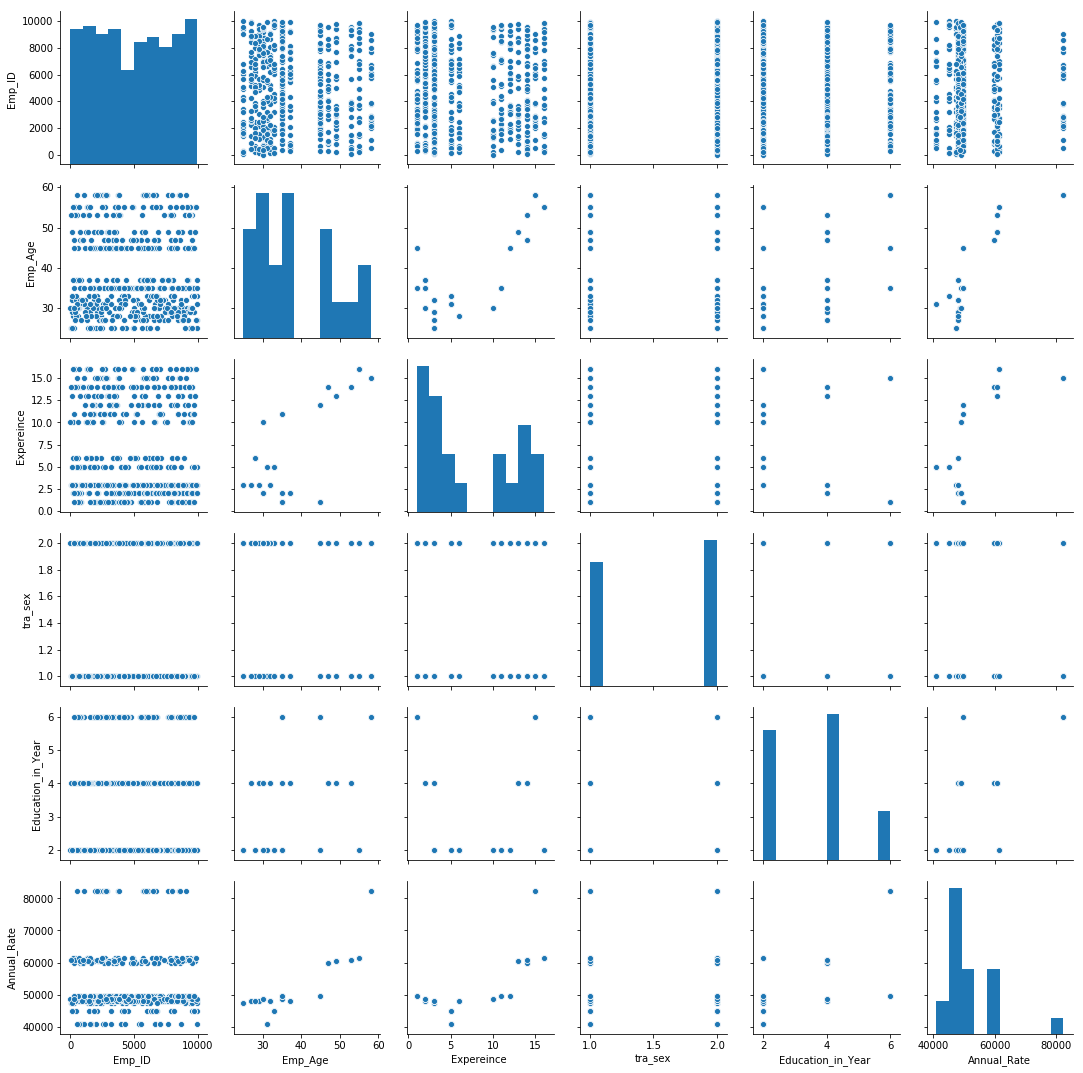

In [18]:
sb.pairplot(data)  # Visualizing the dataset to see if there exist some relationship 

In [19]:
dataCorr = data.corr
dataCorr() 

,Emp_ID,Emp_Age,Expereince,tra_sex,Education_in_Year,Annual_Rate
Emp_ID,1.000000,0.007807,-0.030234,-0.029395,0.053870,0.005095
Emp_Age,0.007807,1.000000,0.746029,-0.101372,0.331715,0.823357
Expereince,-0.030234,0.746029,1.000000,-0.060127,-0.215284,0.705731
tra_sex,-0.029395,-0.101372,-0.060127,1.000000,-0.043105,-0.065106
Education_in_Year,0.053870,0.331715,-0.215284,-0.043105,1.000000,0.424159
Annual_Rate,0.005095,0.823357,0.705731,-0.065106,0.424159,1.000000


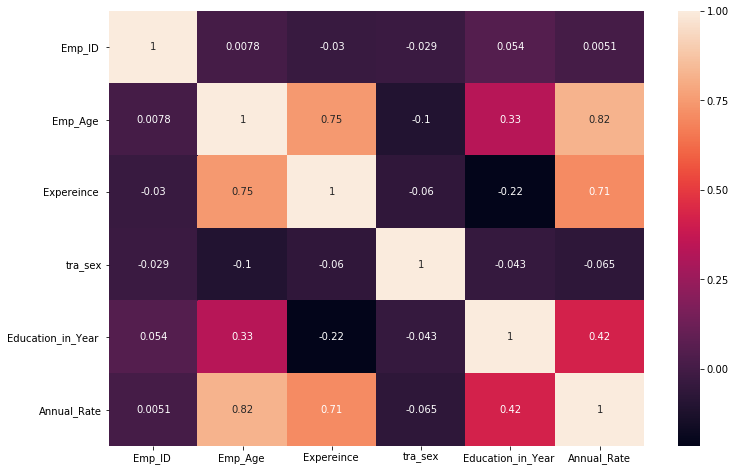

In [20]:
plt.figure(figsize=(12,8))
sb.heatmap(data.corr(),annot=True )
plt.show()                # From the heatmap, strong correlation the light color show strong 
                          # correlation whilit the dark correlation show us the strong negative coorelation.

<h4>Feature Selection</h4>

In [21]:
                     # From  the above , it shows that there is positve relationship between 
                     #Total household income  nnd Total Expenditure

In [22]:
X= data[['Emp_Age ', 'Expereince ','tra_sex', 'Education_in_Year ']]
y= data['Annual_Rate']

In [23]:
y.shape

(500,)

In [24]:
data.columns

Index(['Emp_ID ', 'Emp_Age ', 'Expereince ', 'Sex', 'tra_sex',
       'Education_in_Year ', 'Annual_Rate'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
X_train.shape

(400, 4)

In [27]:
y_train.shape

(400,)

In [28]:
reg=LinearRegression()
reg.fit(X , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
reg.intercept_

28570.882757554788

In [30]:
reg.coef_

array([-1.11634930e+00,  1.40853220e+03,  1.98486961e+02,  3.81914878e+03])

In [31]:
reg.score(X,y)

0.8461934297997278

In [32]:
reg.fit(data[['Emp_Age ', 'Expereince ', 'tra_sex', 'Education_in_Year ']],data.Annual_Rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
reg.coef_

array([-1.11634930e+00,  1.40853220e+03,  1.98486961e+02,  3.81914878e+03])

In [34]:
reg.intercept_

28570.882757554788

In [35]:
reg.predict([[35,6,1,4]])

array([52458.08584919])

In [36]:
reg.score(X,y)   # Model evaluation 

0.8461934297997278